# Polynomial Regression Analysis Example

Oftentimes you’ll encounter data where the relationship between the feature(s) and the response variable can’t be best described with a straight line.

An example of a plynomial, coud be:

$$ 3x4 – 7x3 + 2x2 + 11 $$

**Terminology**

* Degree of a polynomial: the highest power (largest exponent) in your polynomial; in our example it’s 4 because of x4, meaning that we’re dealing with a 4th degree polynomial

* Coefficient: each number (3, 7, 2, 11) in our polynomial is a coefficient; these are the parameters that are unknown and our polynomial regression model will try to estimate when trained on our dataset

* Leading term: the term with the highest power (in our case it’s 3x4); this is the most important part of a polynomial, because it determines the polynomial’s graph behavior

* Leading coefficient: the coefficient of the leading term (it’s 3 in our polynomial)

* Constant term: the y intercept, it never changes: no matter what the value of x is, the constant term remains the same

### The difference between linear and polynomial regression.

Let’s return to $ 3x4 - 7x3 + 2x2 + 11 $, if we write a polynomial’s terms from the highest degree term to the lowest degree term, it’s called a polynomial’s standard form.

In the context of machine learning, you’ll often see it reversed:

$$ y = \beta_0 + \beta_1x + \beta_2x^2 + … + \beta_nx^n $$

where:

* y is the response variable we want to predict
* x is the feature
* ß0 is the y intercept

The other ßs are the coefficients/parameters we’d like to find when we train our model on the available x and y values

* n is the degree of the polynomial (the higher n is, the more complex curved lines you can create)
* 
The above polynomial regression formula is very similar to the multiple linear regression formula:

$$ y = \beta_0 + \beta_1x + \beta_2x + … + \beta_nx $$

It’s not a coincidence: polynomial regression is a linear model used for describing non-linear relationships

How is this possible? The magic lies in creating new features by raising the original features to a power

Linear regression is just a first-degree polynomial. Polynomial regression uses higher-degree polynomials. Both of them are linear models, but the first results in a straight line, the latter gives you a curved line.

In [1]:
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# create dummy dataset
x = np.arange(0, 30)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

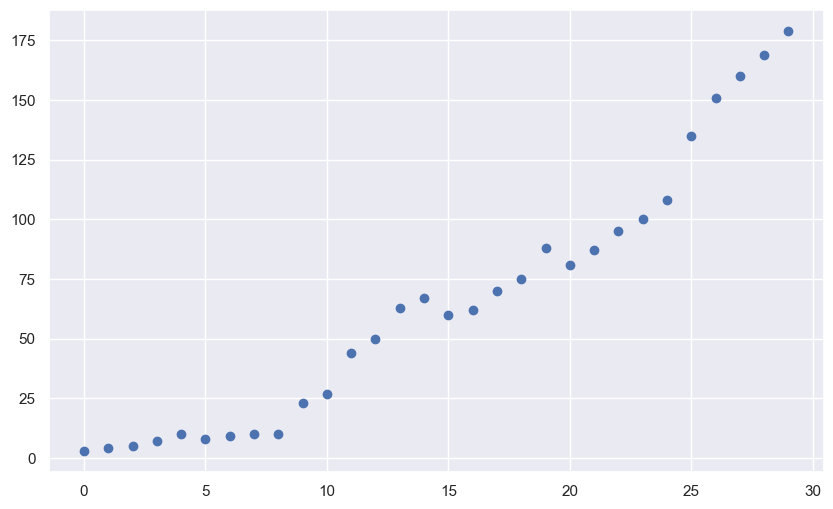

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x, y)
plt.show()

In [3]:
# Create an polynomial instance
poly = PolynomialFeatures(degree=2, include_bias=False)

Degree=2 means that we want to work with a 2nd degree polynomial,

$ y = \beta_0 + \beta_1x + \beta_2x^2 $

In [6]:
poly_features = poly.fit_transform(x.reshape(-1, 1))

In [7]:
from sklearn.linear_model import LinearRegression

Hold up a minute! 😮 Isn’t this tutorial supposed to be about polynomial regression? Why are we importing LinearRegression then?

Just think back to what you’ve read not so long ago: polynomial regression is a linear model, that’s why we import LinearRegression. 🙂

In [8]:
# Create a LinearRegression() instance
poly_reg_model = LinearRegression()

In [9]:
# Fit model to data
poly_reg_model.fit(poly_features, y)

LinearRegression()

In [10]:
# Predict responses
y_predicted = poly_reg_model.predict(poly_features)

In [11]:
y_predicted

array([  1.70806452,   3.04187987,   4.70292388,   6.69119657,
         9.00669792,  11.64942794,  14.61938662,  17.91657397,
        21.54098999,  25.49263467,  29.77150802,  34.37761004,
        39.31094073,  44.57150008,  50.1592881 ,  56.07430478,
        62.31655014,  68.88602415,  75.78272684,  83.00665819,
        90.55781821,  98.4362069 , 106.64182425, 115.17467027,
       124.03474495, 133.22204831, 142.73658033, 152.57834101,
       162.74733037, 173.24354839])

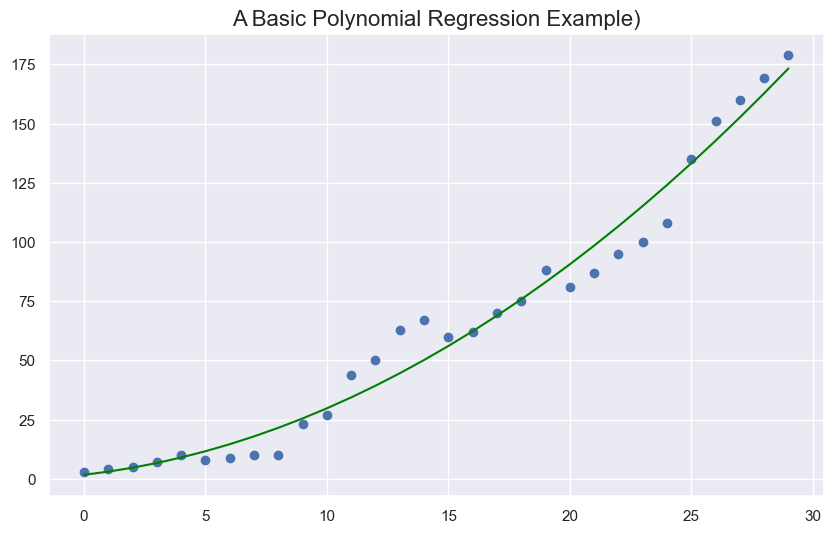

In [13]:
plt.figure(figsize=(10, 6))
plt.title("A Basic Polynomial Regression Example)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="green")
plt.show()

## Polynomial Regression with Multiple Features

In [14]:
# Create data
np.random.seed(1)
x_1 = np.absolute(np.random.randn(100, 1) * 10)
x_2 = np.absolute(np.random.randn(100, 1) * 30)
y = 2*x_1**2 + 3*x_1 + 2 + np.random.randn(100, 1)*20

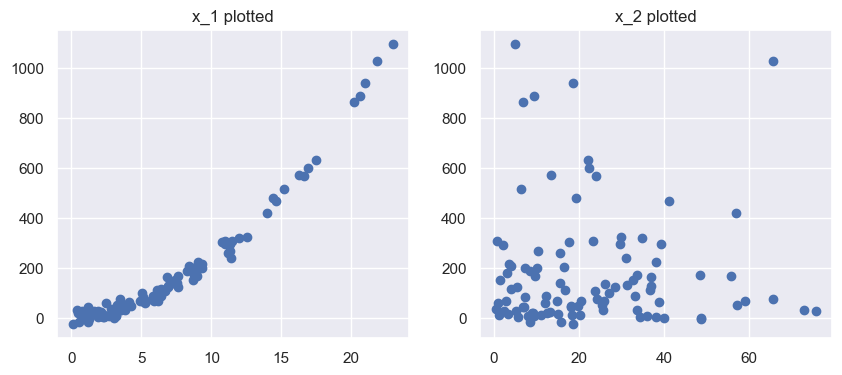

In [15]:
# Create visual
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axes[0].scatter(x_1, y)
axes[1].scatter(x_2, y)
axes[0].set_title("x_1 plotted")
axes[1].set_title("x_2 plotted")
plt.show()

In [16]:
# Create dataframe
df = pd.DataFrame({"x_1":x_1.reshape(100,), "x_2":x_2.reshape(100,), "y":y.reshape(100,)}, index=range(0,100))
df

,x_1,x_2,y
0,16.243454,13.413857,570.412369
1,6.117564,36.735231,111.681987
2,5.281718,12.104749,62.392124
3,10.729686,17.807356,303.538953
4,8.654076,32.847355,151.109269
...,...,...,...
95,0.773401,48.823150,-0.430738
96,3.438537,18.069578,44.308720
97,0.435969,12.608466,19.383456
98,6.200008,24.328550,78.371729


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Define train and test sets
X, y = df[["x_1", "x_2"]], df["y"]
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=42)

In [19]:
# Create polynomial regression
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Test model
poly_reg_y_predicted = poly_reg_model.predict(X_test)

In [22]:
from sklearn.metrics import mean_squared_error

poly_reg_rmse = np.sqrt(mean_squared_error(y_test, poly_reg_y_predicted))
poly_reg_rmse

20.937707839078673

The smaller the RMSE metric the better the model

### Comparing Polynomial vs Linear Regression Models

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)
lin_reg_y_predicted = lin_reg_model.predict(X_test)
lin_reg_rmse = np.sqrt(mean_squared_error(y_test, lin_reg_y_predicted))
lin_reg_rmse

62.302487453878506

In the train_test_split method we use X instead of poly_features, and it’s for a good reason. 

X contains our two original features (x_1 and x_2), so our linear regression model takes the form of:

$ y = ß0 + ß1x1 + ß2x2$

In [24]:
lin_reg_model.coef_

array([43.73176255, -0.53140809])

In [25]:
lin_reg_model.intercept_

-117.07280081594811

On the other hand, poly_features contains new features as well, created out of x_1 and x_2, so our polynomial regression model (based on a 2nd degree polynomial with two features) looks like this:

y = ß0 + ß1x1 + ß2x2 + ß3x12 + ß4x22 + ß5x1x2

This is because poly.fit_transform(X) added three new features to the original two (x1 (x_1) and x2 (x_2)): x12, x22 and x1x2.

x12 and x22 need no explanation, as we’ve already covered how they are created in the “Coding a polynomial regression model with scikit-learn” section.

What’s more interesting is x1x2 – when two features are multiplied by each other, it’s called an interaction term. An interaction term accounts for the fact that one variable’s value may depend on another variable’s value (more on this here). poly.fit_transform() automatically created this interaction term for us, isn’t that cool? 🙂

In [26]:
poly_reg_model.coef_

array([ 3.61945509, -1.0859955 ,  1.89905813,  0.0207338 ,  0.01300394])

In [27]:
lin_reg_rmse

62.302487453878506

The RMSE for the polynomial regression model is 20.94 (rounded), while the RMSE for the linear regression model is 62.3 (rounded). The polynomial regression model performs almost 3 times better than the linear regression model. That’s a spectacular difference.

## Conclusion

Hopefully you’ve gained enough knowledge to have a basic understanding of polynomial regression. Not only that, you should also know one method (RMSE) for comparing the performance of machine learning models.

Throughout this article we used a 2nd degree polynomial for our polynomial regression models. Naturally, you should always test before model deployment what degree of polynomial performs best on your dataset (after finishing this article, you should suspect how to do that! 😉).

## References

Special thanks to **Tamas Ujhelyi**, whose [article](https://data36.com/polynomial-regression-python-scikit-learn/) I mainly based on.

[How to become a Data Scientist video](https://data36.com/how-to-become-a-data-scientist/)

## Contact

<!-- Avatar -->
<img src="../Pictures/profile2.png" alt="me" width="75" height="80">
<!-- Text with color, font, fontsize and specific size -->
<p style="color:#323232; font-family: Helevetica; font-size: 20px;">Jesus L. Monroy<br>Economist | Data Scientist</p>
<!-- Insert url links in logos -->
<!-- Telegram -->
<a href="https://t.me/j3suslm" target="_blank" rel="noreferrer"> <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Telegram_X_2019_Logo.svg/2048px-Telegram_X_2019_Logo.png?size=16&color=3b3b3b" alt="telegram" width="30" height="22" style="padding-left:8px"/>
<!-- Twitter -->
<a href="https://www.twitter.com/sqlalchemist" target="_blank" rel="noreferrer"> <img src="https://toppng.com/public/uploads/preview/twitter-x-new-logo-round-icon-png-11692480241tdbz6jparr.webp?size=16&color=3b3b3b" alt="twitter" width="30" height="22" style="padding-left:8px"/>
<!-- Github -->
<a href="https://github.com/SqlAlchemist/My-portfolio" target="_blank" rel="noreferrer"> <img src="https://icongr.am/devicon/github-original.svg?size=16&color=3b3b3b" alt="github" width="30" height="30" style="padding-left:8px"/>
<!-- Linkedin -->
<a href="https://www.linkedin.com/in/j3sus-lmonroy" target="_blank" rel="noreferrer"> <img src="https://icongr.am/simple/linkedin.svg?size=16&color=3b3b3b" alt="linkedin" width="30" height="30" style="padding-left:8px"/>
<!-- Medium -->
<a href="https://medium.com/@jesus_lmonroy" target="_blank" rel="noreferrer"> <img src="https://cdn1.iconfinder.com/data/icons/social-media-and-logos-12/32/Logo_medium-512.png?size=55&color=3b3b3b" alt="medium" width="30" height="33" style="padding-left:8px"/>